<a href="https://colab.research.google.com/github/Saltire78/ITT_Labs/blob/main/Irish_Weather_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##***Irish Weather Analysis***

An analysis of the weather conditions of several Irish weather stations over a number of years, taken from the Met Eireann data files, as recorded on an hourly basis. The project will include:
* Visualisation of the data in user-friendly trends
* Comparisons of these trends on a regular basis
* Machine Learning analysis to look from predictive analysis
* Databasing the recordings to allow for data retrieval on a search basis, by criteria

## Importing Libraries and Data Manipulation
Importing of the necessary libraries to run the required analyses and altering their data to the correct formats

In [2]:
import matplotlib.pyplot as plt # plotting
import seaborn as sns
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import datetime as dt # date and time library
from datetime import datetime # date and time functions
import sqlite3

Data Source
* Source file from Kaggle dataset

In [3]:
# https://www.kaggle.com/conorrot/irish-weather-hourly-data

Upload the dataset

* Local Drive
* Save file from Kaggle site and store in local drive. Access via the following code:

In [ ]:
from google.colab import files

files.upload()

Saving hrly_Irish_weather.csv to hrly_Irish_weather.csv


* Google Drive
* Access google drive and upload the file manually

In [29]:
#!pip install -U -q PyDrive
#from pydrive.auth import GoogleAuth
#from pydrive.drive import GoogleDrive
#from google.colab import auth
#from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
#auth.authenticate_user()
#gauth = GoogleAuth()
#gauth.credentials = GoogleCredentials.get_application_default()
#drive = GoogleDrive(gauth)

#link = 'https://drive.google.com/file/d/1GsLczoe7jLyer6dOjxQkOFXHgR7-NKwO/view?usp=sharing'
#code = '4/1AY0e-g4Sq3NhWbfSh1ptYV9FigKorZmT_gvinj-Ejv8Jc0B4U5HC49mSvU0'

#fluff, id = link.split('=')
#print (id) # Verify that you have everything after '='

#downloaded = drive.CreateFile({'id':id}) 
#downloaded.GetContentFile('hrly_Irish_weather.csv')  
#df3 = pd.read_csv('hrly_Irish_weather.csv')

Create a raw data dataset

In [30]:
raw_data = pd.read_csv("hrly_Irish_weather.csv")

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (5,6,7,8,9,10,11,12,13,14,15,16,17) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Confirm the new dataset is intact and accurate

In [31]:
raw_data.head

<bound method NDFrame.head of          county       station  latitude  longitude  ...  sun    vis clht clamt
0        Galway       ATHENRY    53.289     -8.786  ...  NaN    NaN  NaN   NaN
1        Galway       ATHENRY    53.289     -8.786  ...  NaN    NaN  NaN   NaN
2        Galway       ATHENRY    53.289     -8.786  ...  NaN    NaN  NaN   NaN
3        Galway       ATHENRY    53.289     -8.786  ...  NaN    NaN  NaN   NaN
4        Galway       ATHENRY    53.289     -8.786  ...  NaN    NaN  NaN   NaN
...         ...           ...       ...        ...  ...  ...    ...  ...   ...
1048570    Cork  CORK AIRPORT    51.847     -8.486  ...    0  30000   35     6
1048571    Cork  CORK AIRPORT    51.847     -8.486  ...    0  40000  999     2
1048572    Cork  CORK AIRPORT    51.847     -8.486  ...    0  40000  999     1
1048573    Cork  CORK AIRPORT    51.847     -8.486  ...    0  40000  999     3
1048574    Cork  CORK AIRPORT    51.847     -8.486  ...    0  40000  999     2

[1048575 rows x 18 co

Claremorris, as the least complete of the Mayo stations - and therefore most adapted by replacing Nan values, will be deleted from the linear regression.

In [32]:
raw_data.drop(raw_data[raw_data.station == 'CLAREMORRIS'].index, inplace=True)

Ascertain the data types of the data

In [33]:
dataTypeSeries = raw_data.dtypes
print('Data type of each column of Dataframe :')
print(dataTypeSeries)

Data type of each column of Dataframe :
county        object
station       object
latitude     float64
longitude    float64
date          object
rain          object
temp          object
wetb          object
dewpt         object
vappr         object
rhum          object
msl           object
wdsp          object
wddir         object
sun           object
vis           object
clht          object
clamt         object
dtype: object


Convert to usable formats

In [34]:
# float_data = ["rain", "temp","wetb", "dewpt","vappr", "rhum","msl", "wdsp","wddir", "sun","vis", "clht","clamt"] 

raw_data['rain'] = pd.to_numeric(raw_data.rain , errors='coerce')
raw_data['temp'] = pd.to_numeric(raw_data.temp , errors='coerce')
raw_data['wetb'] = pd.to_numeric(raw_data.wetb , errors='coerce')
raw_data['dewpt'] = pd.to_numeric(raw_data.dewpt , errors='coerce')
raw_data['vappr'] = pd.to_numeric(raw_data.vappr , errors='coerce')
raw_data['rhum'] = pd.to_numeric(raw_data.rhum , errors='coerce')
raw_data['msl'] = pd.to_numeric(raw_data.msl , errors='coerce')
raw_data['wdsp'] = pd.to_numeric(raw_data.wdsp , errors='coerce')
raw_data['wddir'] = pd.to_numeric(raw_data.wddir , errors='coerce')
raw_data['sun'] = pd.to_numeric(raw_data.sun , errors='coerce')
raw_data['vis'] = pd.to_numeric(raw_data.vis , errors='coerce')
raw_data['clht'] = pd.to_numeric(raw_data.clht , errors='coerce')
raw_data['clamt'] = pd.to_numeric(raw_data.clamt , errors='coerce')

# Attempt to run as a for loop of 'float_data' met formatting issues, so ran individually. Will attempt to resolve later


In [35]:
raw_data['date'] = pd.to_datetime(raw_data['date'])


In [36]:
raw_data['county'] = pd.Series(raw_data['county'], dtype="string")
raw_data['station'] = pd.Series(raw_data['station'], dtype="string")

Remove superfluous data

In [37]:
del raw_data['latitude']
del raw_data['longitude']
del raw_data['wetb']
del raw_data['sun']
del raw_data['vis']
del raw_data['clht']
del raw_data['clamt']

Check for NaN values

In [38]:
print(raw_data.isnull().values.any())
print(raw_data.isnull().sum().sum())

True
11200


In [39]:
count_nan_in_df = raw_data.isnull().sum()
print (count_nan_in_df)

county        0
station       0
date          0
rain        328
temp       2331
dewpt      2437
vappr      2437
rhum        377
msl        2495
wdsp        249
wddir       546
dtype: int64


Ammending Dataframe to get data is desired format
* seperating from raw_data to allow machine learning at later time

In [40]:
raw_data_linear = raw_data
column_means = raw_data_linear.mean()
raw_data_linear = raw_data_linear.fillna(column_means)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  


In [41]:
count_nan_in_df = raw_data_linear.isnull().sum()
print (count_nan_in_df)

county     0
station    0
date       0
rain       0
temp       0
dewpt      0
vappr      0
rhum       0
msl        0
wdsp       0
wddir      0
dtype: int64


Add Columns for Generalised data information
* This will make the data perfect for non-SQL database

In [42]:
raw_data_linear['Date'] = raw_data_linear['date'].dt.date
raw_data_linear['Time'] = raw_data_linear['date'].dt.time

In [43]:
raw_data_linear["Wind"] = raw_data_linear["wddir"]
raw_data_linear["Rain"] = raw_data_linear["rain"]
raw_data_linear["Temp"] = raw_data_linear["temp"]
raw_data_linear["Season"] = raw_data_linear["station"]

Generalised Wind Direction

In [44]:
def wind_direction(raw_data_linear):
    if 0<=raw_data_linear['wddir']<=22:
        return 'N'
    elif 23<=raw_data_linear['wddir']<=67:
        return 'NE'
    elif 68<=raw_data_linear['wddir']<=112:
        return 'E'
    elif 113<=raw_data_linear['wddir']<=157:
        return 'SE'
    elif 158<=raw_data_linear['wddir']<=202:
        return 'S'
    elif 203<=raw_data_linear['wddir']<=247:
        return 'SW'
    elif 248<=raw_data_linear['wddir']<=292:
        return 'W'
    elif 293<=raw_data_linear['wddir']<=337:
        return 'NW'
    else:
        return 'N'

raw_data_linear['Wind'] = raw_data_linear.apply(wind_direction, axis = 1)

Generalised Rainfall

In [45]:
def rainfall_mm_hr(raw_data_linear):
    if 0<raw_data_linear['rain']<=2.5:
        return 'Light'
    elif 2.5<raw_data_linear['rain']<=7.6:
        return 'Moderate'
    elif 7.6<raw_data_linear['rain']<=50:
        return 'Heavy'
    elif 50<raw_data_linear['rain']:
        return 'Violent'
    else:
        return 'None'

raw_data_linear['Rain'] = raw_data_linear.apply(rainfall_mm_hr, axis = 1)

Generalised Temperature

In [46]:
def temperature(raw_data_linear):
    if raw_data_linear['temp']<=0:
        return 'Freezing'
    elif 0<raw_data_linear['temp']<=5:
        return 'Cold'
    elif 5<raw_data_linear['temp']<=10:
        return 'Cool'
    elif 10<raw_data_linear['temp']<=20:
        return 'Moderate'
    elif 20<raw_data_linear['temp']<=30:
        return 'Warm'
    elif 30<raw_data_linear['temp']:
        return 'Hot'

raw_data_linear['Temp'] = raw_data_linear.apply(temperature, axis = 1)

Seasons

In [47]:
raw_data_linear['day'] = pd.DatetimeIndex(raw_data_linear['Date']).day
raw_data_linear['month'] = pd.DatetimeIndex(raw_data_linear['Date']).month
raw_data_linear['year'] = pd.DatetimeIndex(raw_data_linear['Date']).year

In [48]:
def season(raw_data_linear):
    if 3<=raw_data_linear['month']<6:
        return 'Spring'
    elif 6<=raw_data_linear['month']<9:
        return 'Summer'
    elif 9<=raw_data_linear['month']<11:
        return 'Autumn'
    else:
        return 'Winter'

raw_data_linear['Season'] = raw_data_linear.apply(season, axis = 1)

Rain Present?
* Column to be used for ML purposes

In [49]:
raw_data_linear["Rain_Y_N"] = raw_data_linear["rain"]

def rainfall(raw_data_linear):
    if raw_data_linear['rain']==0:
        return 'N'
    else:
        return 'Y'

raw_data_linear['Rain_Y_N'] = raw_data_linear.apply(rainfall, axis = 1)

Rename columns for clarity

In [50]:
raw_data_linear.columns = ['County', 'Station','Datestamp','Rainfall','TempC','DewpointC','Vapour','Humidity','Air_Press','Wind_Speed','Direction','Date','Time','Wind','Rain','Temp','Season','Day','Month','Year','Rain_Y_N']

Change new column types

In [51]:
raw_data_linear['Date'] = pd.to_datetime(raw_data_linear['Date'])
raw_data_linear['Wind'] = pd.Series(raw_data_linear['Wind'], dtype="string")
raw_data_linear['Rain'] = pd.Series(raw_data_linear['Rain'], dtype="string")
raw_data_linear['Temp'] = pd.Series(raw_data_linear['Temp'], dtype="string")
raw_data_linear['Season'] = pd.Series(raw_data_linear['Season'], dtype="string")

In [53]:
raw_data_linear.head()

,County,Station,Datestamp,Rainfall,TempC,DewpointC,Vapour,Humidity,Air_Press,Wind_Speed,Direction,Date,Time,Wind,Rain,Temp,Season,Day,Month,Year,Rain_Y_N
0,Galway,ATHENRY,2011-06-26 01:00:00,0.0,15.3,13.9,15.8,90.0,1016.0,8.0,190.0,2011-06-26,01:00:00,S,None,Moderate,Summer,26,6,2011,N
1,Galway,ATHENRY,2011-06-26 02:00:00,0.0,14.7,12.9,14.9,89.0,1015.8,7.0,190.0,2011-06-26,02:00:00,S,None,Moderate,Summer,26,6,2011,N
2,Galway,ATHENRY,2011-06-26 03:00:00,0.0,14.3,12.6,14.6,89.0,1015.5,6.0,190.0,2011-06-26,03:00:00,S,None,Moderate,Summer,26,6,2011,N
3,Galway,ATHENRY,2011-06-26 04:00:00,0.0,14.4,12.8,14.8,90.0,1015.3,7.0,180.0,2011-06-26,04:00:00,S,None,Moderate,Summer,26,6,2011,N
4,Galway,ATHENRY,2011-06-26 05:00:00,0.0,14.4,12.7,14.7,89.0,1015.1,6.0,190.0,2011-06-26,05:00:00,S,None,Moderate,Summer,26,6,2011,N


## Create long-term, site specific datasets

Datasets are not complete for all stations, with only the Mayo and Dublin stations having the complete 30 year timeframe of data. Given this the other stations will be left out of the linear regression, and used only for the later Neural Networking stages, and the Casement and Bellmullet station results will be used as an East/West coast comparision.

* Casement Station, Dublin



In [54]:
raw_Dub = raw_data_linear[raw_data_linear.Station == 'CASEMENT']
raw_Dub = raw_Dub[raw_Dub.Datestamp < '2020-01-1']
raw_Dub.reset_index(inplace = True)
print(raw_Dub)
print(raw_Dub.Datestamp.min())
print(raw_Dub.Datestamp.max())

         index  County   Station           Datestamp  ...  Day  Month  Year  Rain_Y_N
0       478633  Dublin  CASEMENT 1990-01-01 00:00:00  ...    1      1  1990         N
1       478634  Dublin  CASEMENT 1990-01-01 01:00:00  ...    1      1  1990         N
2       478635  Dublin  CASEMENT 1990-01-01 02:00:00  ...    1      1  1990         N
3       478636  Dublin  CASEMENT 1990-01-01 03:00:00  ...    1      1  1990         Y
4       478637  Dublin  CASEMENT 1990-01-01 04:00:00  ...    1      1  1990         Y
...        ...     ...       ...                 ...  ...  ...    ...   ...       ...
262963  741596  Dublin  CASEMENT 2019-12-31 19:00:00  ...   31     12  2019         N
262964  741597  Dublin  CASEMENT 2019-12-31 20:00:00  ...   31     12  2019         N
262965  741598  Dublin  CASEMENT 2019-12-31 21:00:00  ...   31     12  2019         N
262966  741599  Dublin  CASEMENT 2019-12-31 22:00:00  ...   31     12  2019         N
262967  741600  Dublin  CASEMENT 2019-12-31 23:00:00  

* Bellmullet Station, Mayo

In [55]:
raw_Mayo = raw_data_linear[raw_data_linear.Station == 'BELMULLET']
raw_Mayo = raw_Mayo[raw_Mayo.Datestamp < '2020-01-01']
raw_Mayo.reset_index(inplace = True)
print(raw_Mayo)
print(raw_Mayo.Datestamp.min())
print(raw_Mayo.Datestamp.max())

         index County    Station           Datestamp  ...  Day  Month  Year  Rain_Y_N
0       212016   Mayo  BELMULLET 1990-01-01 00:00:00  ...    1      1  1990         N
1       212017   Mayo  BELMULLET 1990-01-01 01:00:00  ...    1      1  1990         N
2       212018   Mayo  BELMULLET 1990-01-01 02:00:00  ...    1      1  1990         N
3       212019   Mayo  BELMULLET 1990-01-01 03:00:00  ...    1      1  1990         N
4       212020   Mayo  BELMULLET 1990-01-01 04:00:00  ...    1      1  1990         Y
...        ...    ...        ...                 ...  ...  ...    ...   ...       ...
262963  474979   Mayo  BELMULLET 2019-12-31 19:00:00  ...   31     12  2019         N
262964  474980   Mayo  BELMULLET 2019-12-31 20:00:00  ...   31     12  2019         N
262965  474981   Mayo  BELMULLET 2019-12-31 21:00:00  ...   31     12  2019         N
262966  474982   Mayo  BELMULLET 2019-12-31 22:00:00  ...   31     12  2019         N
262967  474983   Mayo  BELMULLET 2019-12-31 23:00:00  

* Ballyhaise Station, Cavan

In [56]:
raw_Cavan = raw_data_linear[raw_data_linear.Station == 'BALLYHAISE']
raw_Cavan.reset_index(inplace = True)
print(raw_Cavan)
print(raw_Cavan.Datestamp.min())
print(raw_Cavan.Datestamp.max())

         index County     Station  ... Month  Year  Rain_Y_N
0        78312  Cavan  BALLYHAISE  ...     1  2004         Y
1        78313  Cavan  BALLYHAISE  ...     1  2004         Y
2        78314  Cavan  BALLYHAISE  ...     1  2004         Y
3        78315  Cavan  BALLYHAISE  ...     1  2004         Y
4        78316  Cavan  BALLYHAISE  ...     1  2004         Y
...        ...    ...         ...  ...   ...   ...       ...
133699  212011  Cavan  BALLYHAISE  ...     5  2020         N
133700  212012  Cavan  BALLYHAISE  ...     5  2020         N
133701  212013  Cavan  BALLYHAISE  ...     5  2020         N
133702  212014  Cavan  BALLYHAISE  ...     5  2020         N
133703  212015  Cavan  BALLYHAISE  ...     1  2020         N

[133704 rows x 22 columns]
2004-01-01 01:00:00
2020-12-05 23:00:00


* Cork Airport, Cork

In [57]:
raw_Cork = raw_data_linear[raw_data_linear.Station == 'CORK AIRPORT']
raw_Cork.reset_index(inplace = True)
print(raw_Cork)
print(raw_Cork.Datestamp.min())
print(raw_Cork.Datestamp.max())

         index County       Station  ... Month  Year  Rain_Y_N
0      1011830   Cork  CORK AIRPORT  ...     1  1990         Y
1      1011831   Cork  CORK AIRPORT  ...     1  1990         N
2      1011832   Cork  CORK AIRPORT  ...     1  1990         N
3      1011833   Cork  CORK AIRPORT  ...     1  1990         N
4      1011834   Cork  CORK AIRPORT  ...     1  1990         N
...        ...    ...           ...  ...   ...   ...       ...
36740  1048570   Cork  CORK AIRPORT  ...    11  1994         N
36741  1048571   Cork  CORK AIRPORT  ...    11  1994         N
36742  1048572   Cork  CORK AIRPORT  ...    11  1994         N
36743  1048573   Cork  CORK AIRPORT  ...    11  1994         N
36744  1048574   Cork  CORK AIRPORT  ...    12  1994         N

[36745 rows x 22 columns]
1990-01-01 00:00:00
1994-12-03 00:00:00


* Athenry Station, Galway

In [58]:
raw_Galway = raw_data_linear[raw_data_linear.Station == 'ATHENRY']
raw_Galway.reset_index(inplace = True)
print(raw_Galway)
print(raw_Galway.Datestamp.min())
print(raw_Galway.Datestamp.max())

       index  County  Station           Datestamp  ...  Day  Month  Year  Rain_Y_N
0          0  Galway  ATHENRY 2011-06-26 01:00:00  ...   26      6  2011         N
1          1  Galway  ATHENRY 2011-06-26 02:00:00  ...   26      6  2011         N
2          2  Galway  ATHENRY 2011-06-26 03:00:00  ...   26      6  2011         N
3          3  Galway  ATHENRY 2011-06-26 04:00:00  ...   26      6  2011         N
4          4  Galway  ATHENRY 2011-06-26 05:00:00  ...   26      6  2011         N
...      ...     ...      ...                 ...  ...  ...    ...   ...       ...
78307  78307  Galway  ATHENRY 2020-05-31 20:00:00  ...   31      5  2020         N
78308  78308  Galway  ATHENRY 2020-05-31 21:00:00  ...   31      5  2020         N
78309  78309  Galway  ATHENRY 2020-05-31 22:00:00  ...   31      5  2020         N
78310  78310  Galway  ATHENRY 2020-05-31 23:00:00  ...   31      5  2020         N
78311  78311  Galway  ATHENRY 2020-01-06 00:00:00  ...    6      1  2020         N

[78

## Visual Representations and Linear Regression

* Dublin

Mean values over 30 years in Dublin:
Year          2004.500000
Rainfall         0.088110
TempC            9.828318
Vapour          10.409593
Humidity        83.291327
Air_Press     1013.521185
Wind_Speed      10.197754
dtype: float64

Std Deviation over 30 years in Dublin:
Year          8.667488
Rainfall      0.041838
TempC         2.417700
Vapour        1.499538
Humidity      2.880940
Air_Press     4.403747
Wind_Speed    1.951922
dtype: float64


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  


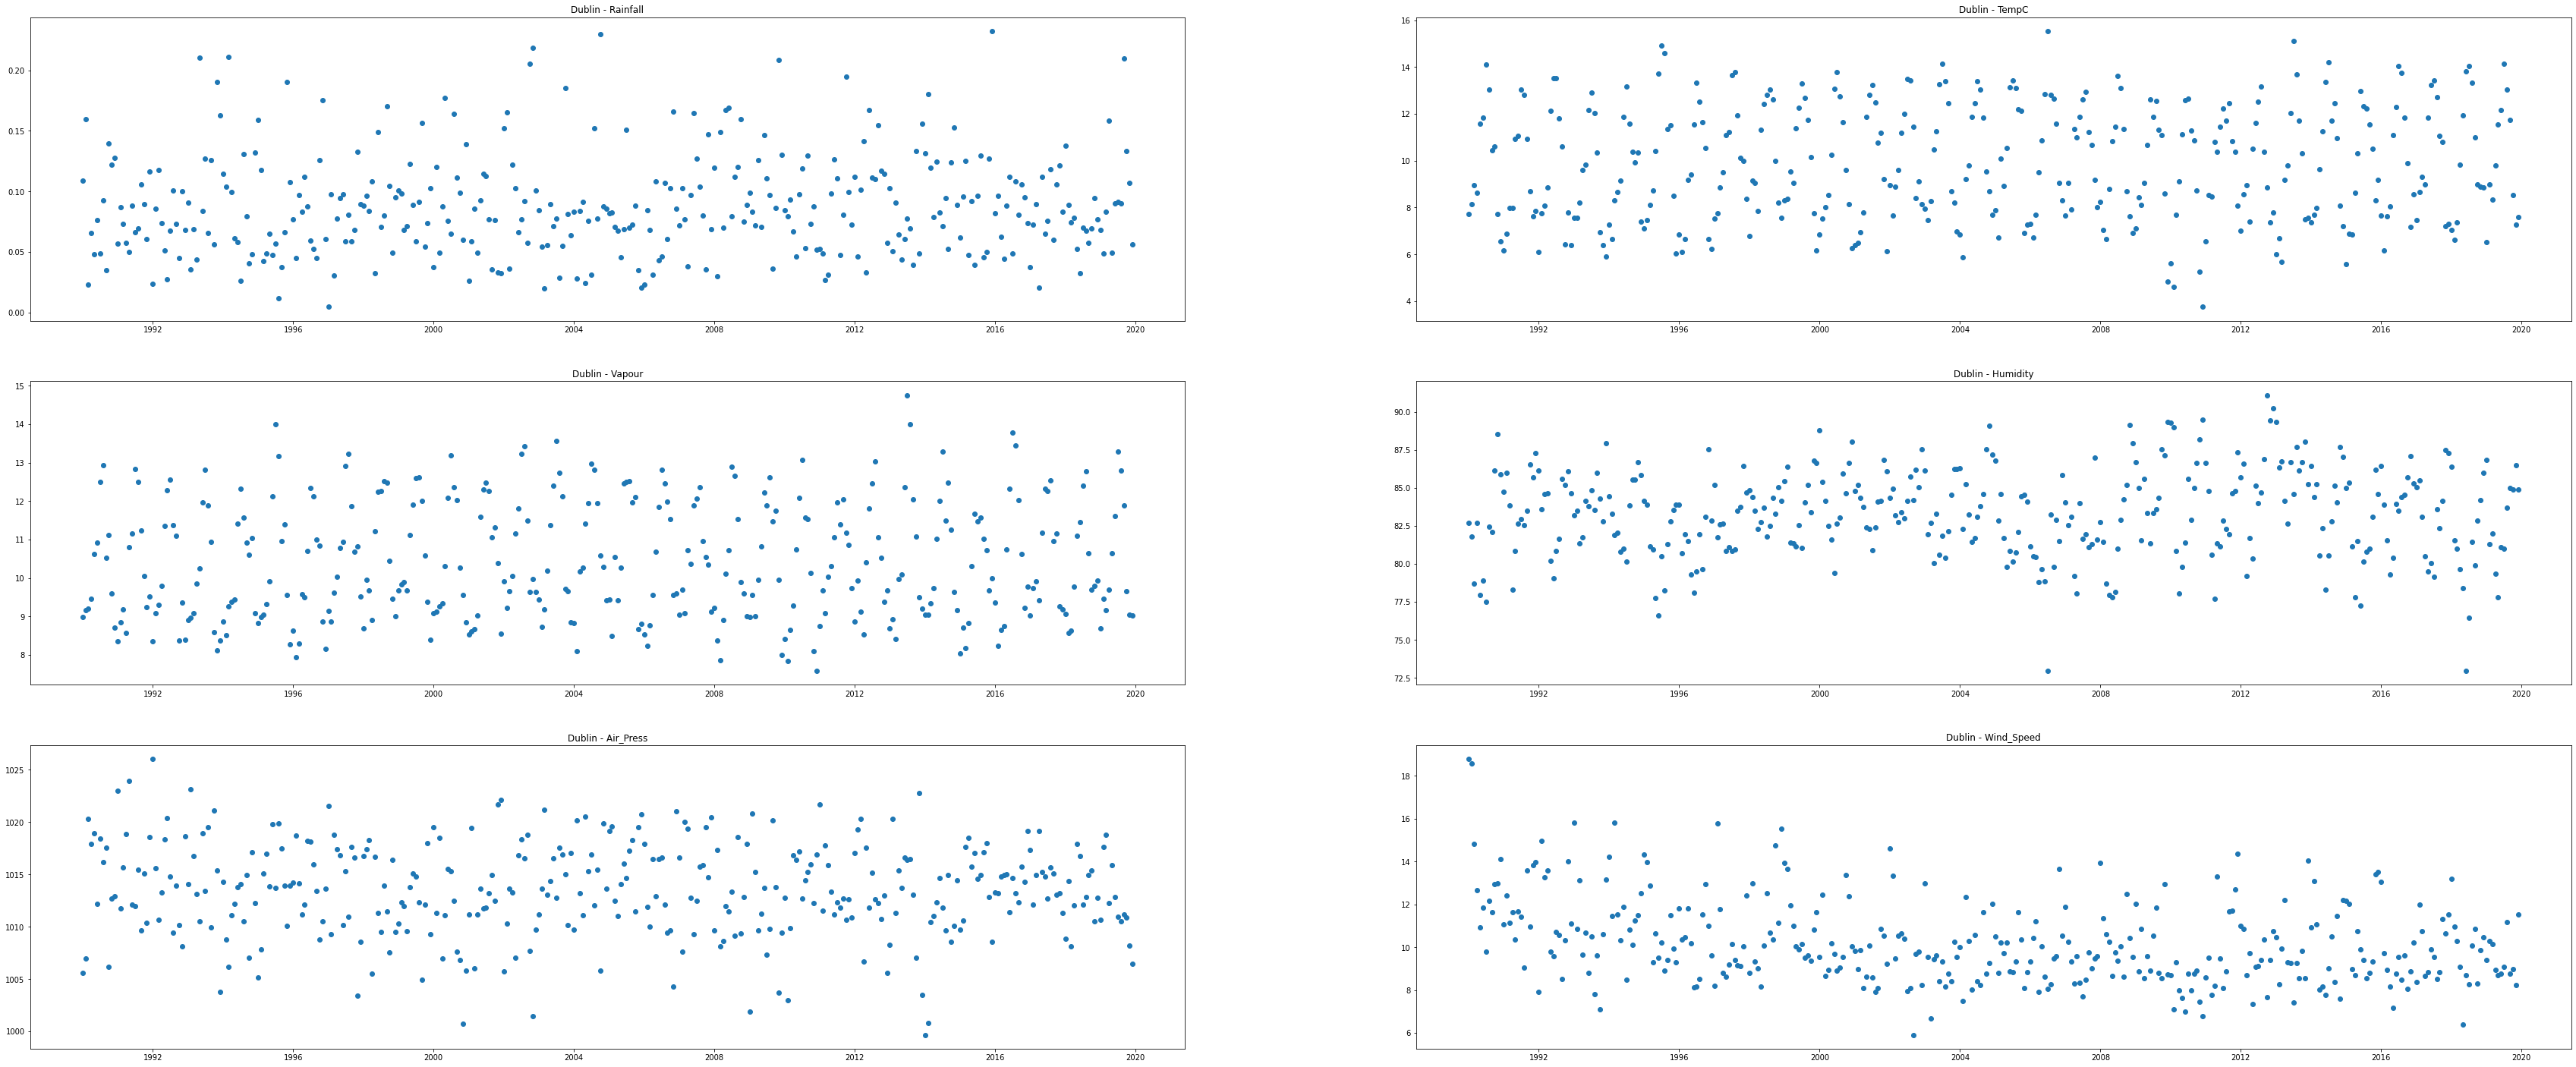

In [63]:
groupedByYearMonth_Dub = raw_Dub.groupby(["Year", "Month"])

monthly_averages_Dub = groupedByYearMonth_Dub.aggregate({"Year":np.min,"Date":np.min,"County":np.min,"Station":np.min,"Rainfall":np.mean,"TempC":np.mean,"Vapour":np.mean,"Humidity":np.mean, "Air_Press":np.mean, "Wind_Speed":np.mean})

print('Mean values over 30 years in Dublin:')
print(monthly_averages_Dub.mean(axis = 0, skipna = True))
print('\nStd Deviation over 30 years in Dublin:')
print(monthly_averages_Dub.std(axis = 0, skipna = True))

#print(monthly_averages_Dub)
#m = monthly_averages_Dub
#print(m.dtypes)
x = monthly_averages_Dub.Date
y = monthly_averages_Dub.Rainfall
#meanY = monthly_averages_Dub.Rainfall.mean()

y1 = monthly_averages_Dub.TempC

y2 = monthly_averages_Dub.Vapour

y3 = monthly_averages_Dub.Humidity

y4 = monthly_averages_Dub.Air_Press

y5 = monthly_averages_Dub.Wind_Speed

plt.rcParams["figure.figsize"] = (60,25)

plt.subplot(3, 2, 1)
plt.plot(x, y, 'o');
#plt.plot(x, monthly_averages_Dub.Rainfall.mean(), 'x');
plt.title("Dublin - Rainfall"); 

#plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))

plt.subplot(3, 2, 2)
plt.plot(x, y1, 'o');
plt.title("Dublin - TempC"); 

plt.subplot(3, 2, 3)
plt.plot(x, y2, 'o');
plt.title("Dublin - Vapour"); 

plt.subplot(3, 2, 4)
plt.plot(x, y3, 'o');
plt.title("Dublin - Humidity"); 

plt.subplot(3, 2, 5)
plt.plot(x, y4, 'o');
plt.title("Dublin - Air_Press"); 

plt.subplot(3, 2, 6)
plt.plot(x, y5, 'o');
plt.title("Dublin - Wind_Speed"); 


* Mayo

Mean values over 30 years in Mayo:
Year          2004.500000
Rainfall         0.143649
TempC           10.469798
Vapour          10.967202
Humidity        84.123416
Air_Press     1012.284223
Wind_Speed      12.577404
dtype: float64

Std Deviation over 30 years in Mayo:
Year          8.667488
Rainfall      0.054227
TempC         2.009534
Vapour        1.491652
Humidity      2.529466
Air_Press     4.733035
Wind_Speed    2.092448
dtype: float64


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  


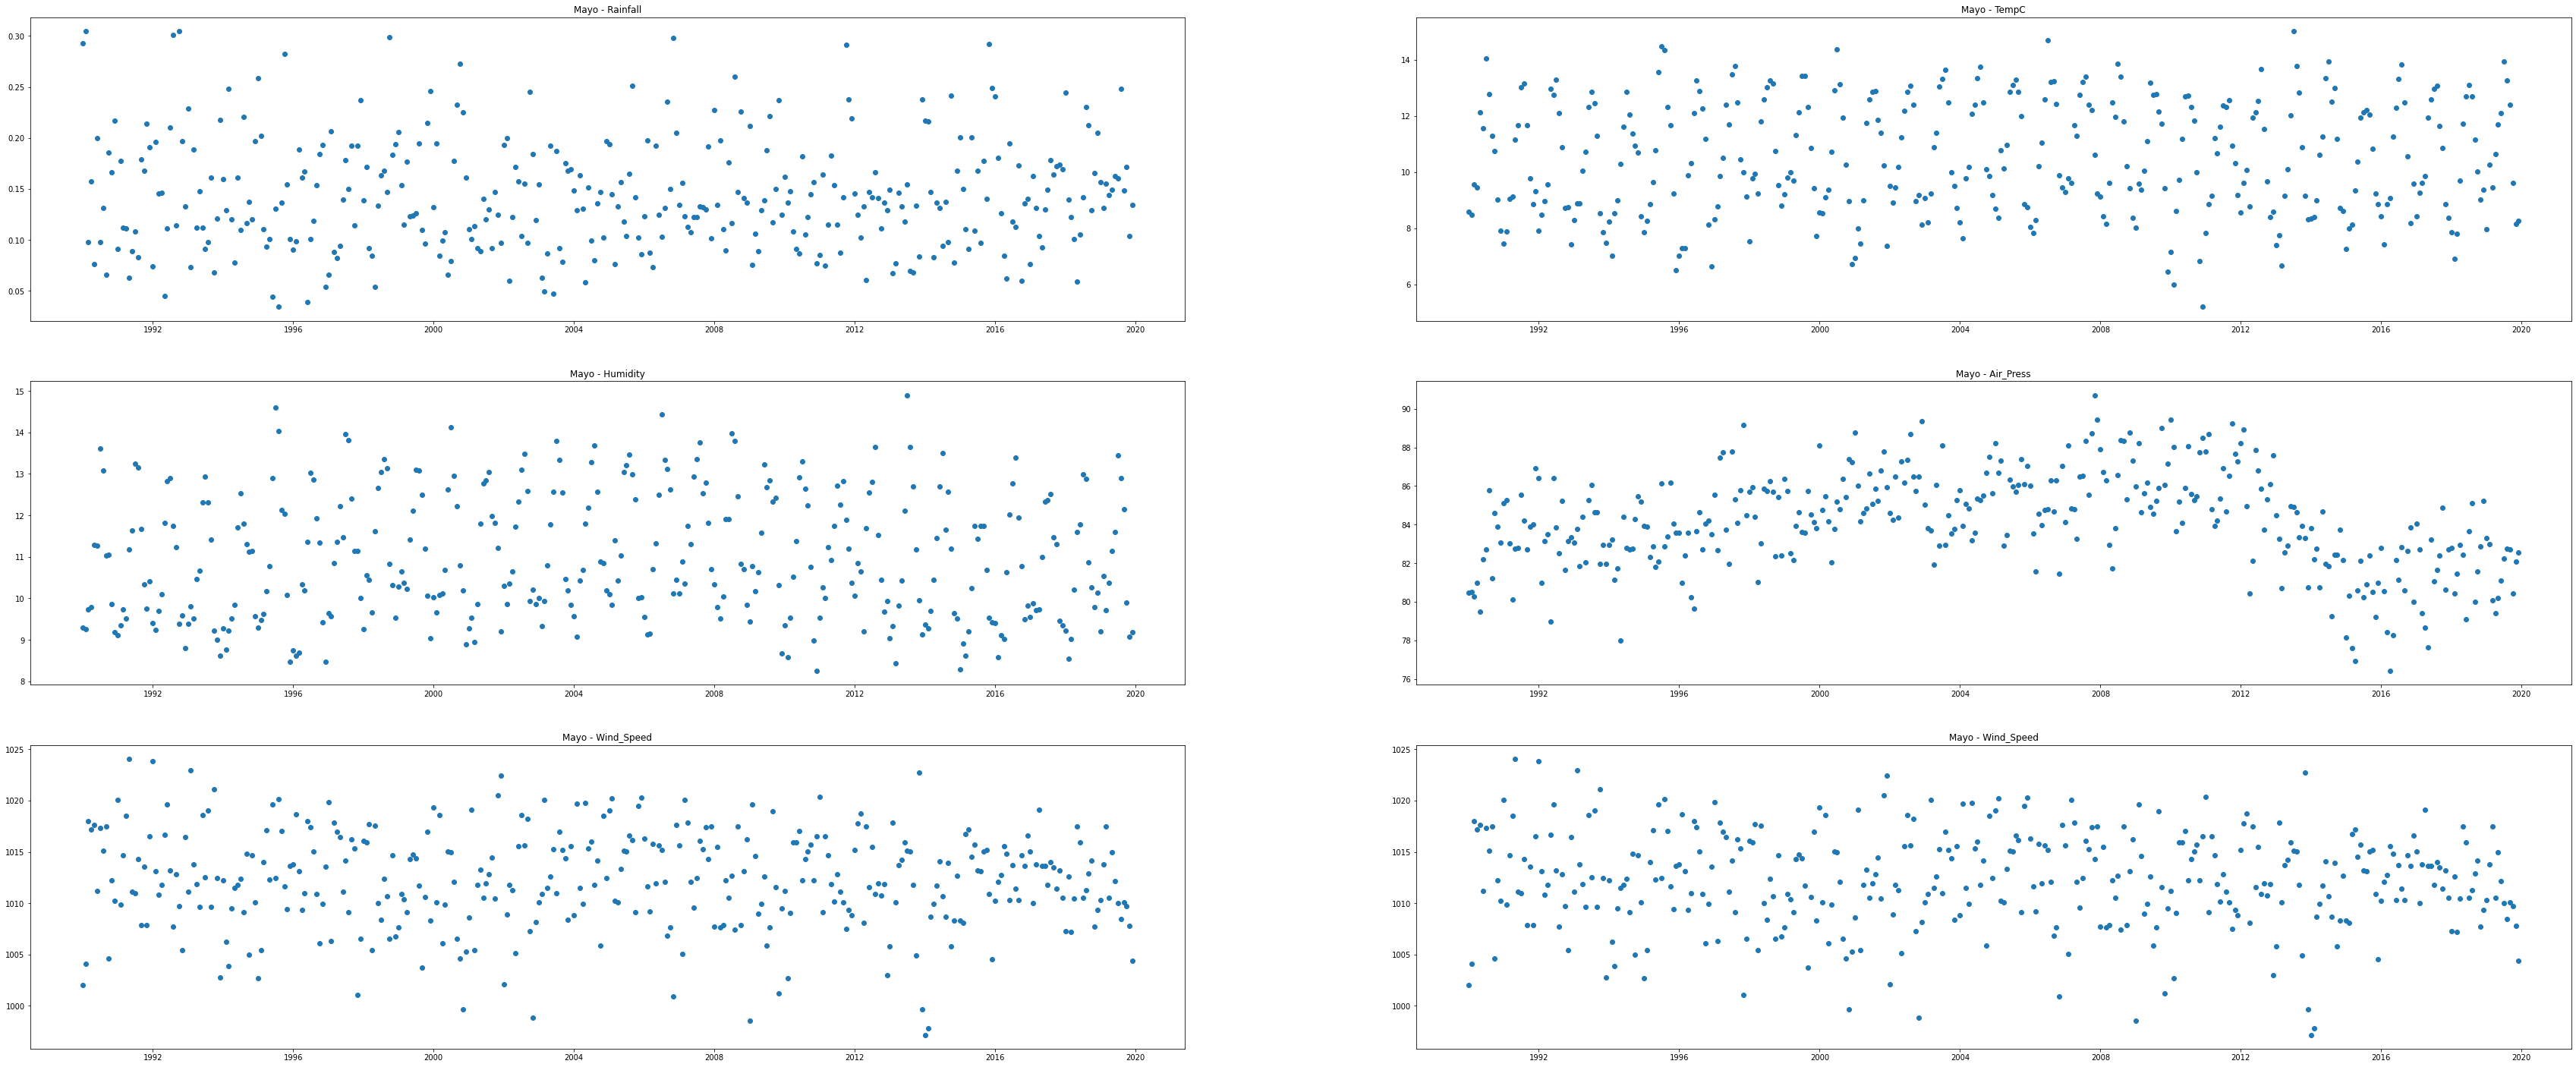

In [91]:
groupedByYearMonth_Mayo = raw_Mayo.groupby(["Year", "Month"])

monthly_averages_Mayo = groupedByYearMonth_Mayo.aggregate({"Year":np.min,"Date":np.min,"County":np.min,"Station":np.min,"Rainfall":np.mean,"TempC":np.mean,"Vapour":np.mean,"Humidity":np.mean, "Air_Press":np.mean, "Wind_Speed":np.mean})

print('Mean values over 30 years in Mayo:')
print(monthly_averages_Mayo.mean(axis = 0, skipna = True))
print('\nStd Deviation over 30 years in Mayo:')
print(monthly_averages_Mayo.std(axis = 0, skipna = True))

#print(monthly_averages_Mayo)
#m = monthly_averages_Mayo
#print(m.dtypes)
x = monthly_averages_Mayo.Date
y = monthly_averages_Mayo.Rainfall

y1 = monthly_averages_Mayo.TempC

y2 = monthly_averages_Mayo.Vapour

y3 = monthly_averages_Mayo.Humidity

y4 = monthly_averages_Mayo.Air_Press

y5 = monthly_averages_Mayo.Wind_Speed

plt.rcParams["figure.figsize"] = (60,25)

plt.subplot(3, 2, 1)
plt.plot(x, y, 'o');
plt.title("Mayo - Rainfall"); 
#plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))

plt.subplot(3, 2, 2)
plt.plot(x, y1, 'o');
plt.title("Mayo - TempC"); 

plt.subplot(3, 2, 3)
plt.plot(x, y2, 'o');
plt.title("Mayo - Humidity"); 

plt.subplot(3, 2, 4)
plt.plot(x, y3, 'o');
plt.title("Mayo - Air_Press"); 

plt.subplot(3, 2, 5)
plt.plot(x, y4, 'o');
plt.title("Mayo - Wind_Speed"); 

plt.subplot(3, 2, 6)
plt.plot(x, y4, 'o');
plt.title("Mayo - Wind_Speed"); 

* Dublin - Deviation from mean

In [ ]:
Rainfall_mean = 0.088110
TempC_mean = 9.828318
Vapour_mean = 10.409593
Humidity_mean = 83.291327
Air_Press_mean = 1013.521185
Wind_Speed_mean = 10.197754

Dublin_Deviation = monthly_averages_Dub.drop(['Year','County','Station'],axis=1)

Dublin_Deviation["Rainfall_Dev"] = monthly_averages_Dub["Rainfall"]
Dublin_Deviation["TempC_Dev"] = monthly_averages_Dub["TempC"]
Dublin_Deviation["Vapour_Dev"] = monthly_averages_Dub["Vapour"]
Dublin_Deviation["Humidity_Dev"] = monthly_averages_Dub["Humidity"]
Dublin_Deviation["Air_Press_Dev"] = monthly_averages_Dub["Air_Press"]
Dublin_Deviation["Wind_Speed_Dev"] = monthly_averages_Dub["Wind_Speed"]

def rain_dev(monthly_averages_Dub):
    value = monthly_averages_Dub["Rainfall"]-Rainfall_mean
    return value

Dublin_Deviation["Rainfall_Dev"] = Dublin_Deviation.apply(rain_dev, axis = 1)

def temp_dev(monthly_averages_Dub):
    value = monthly_averages_Dub["TempC"]-TempC_mean
    return value

Dublin_Deviation["TempC_Dev"] = Dublin_Deviation.apply(temp_dev, axis = 1)

def vap_dev(monthly_averages_Dub):
    value = monthly_averages_Dub["Vapour"]-Vapour_mean
    return value

Dublin_Deviation["Vapour_Dev"] = Dublin_Deviation.apply(vap_dev, axis = 1)

def hum_dev(monthly_averages_Dub):
    value = monthly_averages_Dub["Humidity"]-Humidity_mean
    return value

Dublin_Deviation["Humidity_Dev"] = Dublin_Deviation.apply(hum_dev, axis = 1)

def Air_dev(monthly_averages_Dub):
    value = monthly_averages_Dub["Air_Press"]-Air_Press_mean
    return value

Dublin_Deviation["Air_Press_Dev"] = Dublin_Deviation.apply(Air_dev, axis = 1)

def wind_dev(monthly_averages_Dub):
    value = monthly_averages_Dub["Wind_Speed"]-Wind_Speed_mean
    return value

Dublin_Deviation["Wind_Speed_Dev"] = Dublin_Deviation.apply(wind_dev, axis = 1)

Dublin_Deviation.head()

In [ ]:
x = Dublin_Deviation.Date
y = Dublin_Deviation.Rainfall_Dev

y1 = Dublin_Deviation.TempC_Dev

y2 = Dublin_Deviation.Vapour_Dev

y3 = Dublin_Deviation.Humidity_Dev

y4 = Dublin_Deviation.Air_Press_Dev

y5 = Dublin_Deviation.Wind_Speed_Dev

plt.rcParams["figure.figsize"] = (60,25)

plt.subplot(3, 2, 1)
plt.bar(x, y, 5);
plt.title("Dublin - Rainfall Deviation"); 

plt.subplot(3, 2, 2)
plt.bar(x, y1, 5);
plt.title("Dublin - TempC Deviation"); 

plt.subplot(3, 2, 3)
plt.bar(x, y2, 5);
plt.title("Dublin - Vapour Deviation"); 

plt.subplot(3, 2, 4)
plt.bar(x, y3, 5);
plt.title("Dublin - Humidity"); 

plt.subplot(3, 2, 5)
plt.bar(x, y4, 5);
plt.title("Dublin - Air_Press Deviation"); 

plt.subplot(3, 2, 6)
plt.bar(x, y5, 5);
plt.title("Dublin - Wind_Speed Deviation"); 

* Mayo Deviation from Mean

In [ ]:
Rainfall_mean = 0.143649
TempC_mean = 10.469798
Vapour_mean = 10.967202
Humidity_mean = 84.123416
Air_Press_mean = 1012.284223
Wind_Speed_mean = 12.577404

Mayo_Deviation = monthly_averages_Mayo.drop(['Year','County','Station'],axis=1)

Mayo_Deviation["Rainfall_Dev"] = monthly_averages_Mayo["Rainfall"]
Mayo_Deviation["TempC_Dev"] = monthly_averages_Mayo["TempC"]
Mayo_Deviation["Vapour_Dev"] = monthly_averages_Mayo["Vapour"]
Mayo_Deviation["Humidity_Dev"] = monthly_averages_Mayo["Humidity"]
Mayo_Deviation["Air_Press_Dev"] = monthly_averages_Mayo["Air_Press"]
Mayo_Deviation["Wind_Speed_Dev"] = monthly_averages_Mayo["Wind_Speed"]

def rain_dev(monthly_averages_Mayo):
    value = monthly_averages_Mayo["Rainfall"]-Rainfall_mean
    return value

Mayo_Deviation["Rainfall_Dev"] = Mayo_Deviation.apply(rain_dev, axis = 1)

def temp_dev(monthly_averages_Mayo):
    value = monthly_averages_Mayo["TempC"]-TempC_mean
    return value

Mayo_Deviation["TempC_Dev"] = Mayo_Deviation.apply(temp_dev, axis = 1)

def vap_dev(monthly_averages_Mayo):
    value = monthly_averages_Mayo["Vapour"]-Vapour_mean
    return value

Mayo_Deviation["Vapour_Dev"] = Mayo_Deviation.apply(vap_dev, axis = 1)

def hum_dev(monthly_averages_Mayo):
    value = monthly_averages_Mayo["Humidity"]-Humidity_mean
    return value

Mayo_Deviation["Humidity_Dev"] = Mayo_Deviation.apply(hum_dev, axis = 1)

def Air_dev(monthly_averages_Mayo):
    value = monthly_averages_Mayo["Air_Press"]-Air_Press_mean
    return value

Mayo_Deviation["Air_Press_Dev"] = Mayo_Deviation.apply(Air_dev, axis = 1)

def wind_dev(monthly_averages_Mayo):
    value = monthly_averages_Mayo["Wind_Speed"]-Wind_Speed_mean
    return value

Mayo_Deviation["Wind_Speed_Dev"] = Mayo_Deviation.apply(wind_dev, axis = 1)

Mayo_Deviation.head()

In [ ]:
x = Mayo_Deviation.Date
y = Mayo_Deviation.Rainfall_Dev

y1 = Mayo_Deviation.TempC_Dev

y2 = Mayo_Deviation.Vapour_Dev

y3 = Mayo_Deviation.Humidity_Dev

y4 = Mayo_Deviation.Air_Press_Dev

y5 = Mayo_Deviation.Wind_Speed_Dev

plt.rcParams["figure.figsize"] = (60,25)

plt.subplot(3, 2, 1)
plt.bar(x, y, 5);
plt.title("Mayo - Rainfall Deviation"); 

plt.subplot(3, 2, 2)
plt.bar(x, y1, 5);
plt.title("Mayo - TempC Deviation"); 

plt.subplot(3, 2, 3)
plt.bar(x, y2, 5);
plt.title("Mayo - Vapour Deviation"); 

plt.subplot(3, 2, 4)
plt.bar(x, y3, 5);
plt.title("Mayo - Humidity"); 

plt.subplot(3, 2, 5)
plt.bar(x, y4, 5);
plt.title("Mayo - Air_Press Deviation"); 

plt.subplot(3, 2, 6)
plt.bar(x, y5, 5);
plt.title("Mayo - Wind_Speed Deviation"); 

## Machine Learning using differing Classifiers

In [ ]:
from sklearn.model_selection import train_test_split

data = raw_data

# Select the relevant numerical columns.
selected_cols = ['rain','temp', 'dewpt', 'vappr', 'rhum', 'msl', 'wdsp', 'wddir']
data = data[selected_cols].dropna()

data["Rain_Y_N"] = data["rain"]

def rainfall(data):
    if data['rain']==0:
        return 1
    else:
        return 2

data['Rain_Y_N'] = data.apply(rainfall, axis = 1)

data = data.drop('rain', axis=1)

# Shuffle the dataset.
data_shuffled = data.sample(frac=1.0, random_state=0)

# Split into input part X and output part Y.
X = data_shuffled.drop('Rain_Y_N', axis=1)

# Map the diagnosis code to a human-readable label.
def to_label(y):
    return [None,'No','Yes'][(int(y))]

Y = data_shuffled['Rain_Y_N'].apply(to_label)


# Partition the data into training and test sets.
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.2, random_state=0)

#print(Y.head())
#print(X.head())
#print(data.head())

* Decision Tree Classifier

In [ ]:
from sklearn import tree
from sklearn.model_selection import cross_val_score

tclf = tree.DecisionTreeClassifier()
tclf = tclf.fit(Xtrain,Ytrain)
cross_val_score(tclf, Xtrain, Ytrain, cv=5, scoring='accuracy').mean()

0.7947820593293201

* Random Forest CLassifier

In [ ]:
from sklearn import ensemble
from sklearn.model_selection import cross_val_score


rfclf = ensemble.RandomForestClassifier()
rfclf = rfclf.fit(Xtrain,Ytrain)
cross_val_score(rfclf, Xtrain, Ytrain, cv=5, scoring='accuracy').mean()

0.8527509795529541

* Gradient Boosting Classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score


gbclf = ensemble.GradientBoostingClassifier()
gbclf = gbclf.fit(Xtrain,Ytrain)
cross_val_score(gbclf, Xtrain, Ytrain, cv=5, scoring='accuracy').mean()

0.8496476207497781

* Linear classifier using Perceptron

In [ ]:
from sklearn import linear_model
from sklearn.model_selection import cross_val_score

lmclf = linear_model.Perceptron()
lmclf = lmclf.fit(Xtrain,Ytrain)
cross_val_score(lmclf, Xtrain, Ytrain, cv=5, scoring='accuracy').mean()

0.8005891624768429

* Linear classifier using LogisticRegression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

lrclf = LogisticRegression(solver='newton-cg',max_iter=5000)
lrclf = lrclf.fit(Xtrain,Ytrain)
cross_val_score(lrclf, Xtrain, Ytrain, cv=5, scoring='accuracy').mean()

/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

0.8409970530836572

* Linear classifier using LinearSVC

In [ ]:
#from sklearn.svm import LinearSVC
#from sklearn.model_selection import cross_val_score

#lsclf = LinearSVC(max_iter=10000000)
#lsclf = lsclf.fit(Xtrain,Ytrain)
#cross_val_score(lsclf, Xtrain, Ytrain, cv=5, scoring='accuracy').mean()

# ConvergenceWarning: Liblinear failed to converge, increase the number of iterations. - Unable to resolve with this classifier, system either hung or was so slow it appeared that way

Neural Network

In [ ]:
from sklearn import neural_network
from sklearn.model_selection import cross_val_score

mlpclf = neural_network.MLPClassifier()
mlpclf = mlpclf.fit(Xtrain,Ytrain)
cross_val_score(mlpclf, Xtrain, Ytrain, cv=5, scoring='accuracy').mean()

0.8469502367638768

**Of all the classifiers the Random Forest Classifier provided the most accurate ML model, with an accuracy of ~85.3%**

In [ ]:
from sklearn.metrics import accuracy_score
  
rfclf.fit(Xtrain, Ytrain)
Yguess = rfclf.predict(Xtest)
print(accuracy_score(Ytest, Yguess))

0.8528369704749679


## Databases

* SQL

In [ ]:
!pip install db-sqlite3

import sqlite3

db = sqlite3.connect("Irish_Weather.db")

!ls

     |████████████████████████████████| 174kB 8.8MB/s 
  Created wheel for db-sqlite3: filename=db_sqlite3-0.0.1-cp36-none-any.whl size=1797 sha256=f9614bd564b9cc8c52a7f19bcc06a2faea58eeaf44b2fbea34ad393827fad8fd
  Stored in directory: /root/.cache/pip/wheels/e0/f8/cb/08e3a3a63bdea9ac3a0cccd140636b6cf94e3fb7df1070b12e
  Created wheel for db: filename=db-0.1.1-cp36-none-any.whl size=3894 sha256=a2d23fa3248af152cb48f6d19ef3eba83bd28e3c13297ecf29459aade1f90694
  Stored in directory: /root/.cache/pip/wheels/30/eb/ba/237fa002d1d1b2e73cedcefd26a9db37c4b72c7e5156ea0501
  Created wheel for antiorm: filename=antiorm-1.2.1-cp36-none-any.whl size=31666 sha256=78fc8eefc74152b8137234f6c929a953e78e5d3a2373a8fa057acd6ae83822a6
  Stored in directory: /root/.cache/pip/wheels/b0/91/4d/f8fe808786ff1cda9e7e99e1b1bbda9196ab26786017965313
Successfully built db-sqlite3 db antiorm
hrly_Irish_weather.csv	Irish_Weather.db  sample_data


In [ ]:
db.execute("drop table if exists weather_readings")
try:
  db.execute("CREATE TABLE weather_readings (County TEXT NOT NULL, Station TEXT NOT NULL, Rainfall FLOAT, TempC FLOAT, DewpointC FLOAT, Vapour FLOAT, Humidity FLOAT, Air_Press FLOAT, Wind_Speed FLOAT, Direction FLOAT, Date DATE, Time TIME, Wind TEXT NOT NULL, Rain TEXT NOT NULL, Temp TEXT NOT NULL, Season TEXT NOT NULL, Day INTEGER, Month INTEGER, Year INTEGER, Rain_Y_N OBJECT)")
except:
  print("Already table existed !!")

In [ ]:
curs = db.cursor()

In [ ]:
curs.execute("SELECT name FROM sqlite_master WHERE type = 'table'").fetchall()

[('weather_readings',)]

In [ ]:
for row in curs.execute("PRAGMA table_info(machines)"):
    print(row)

Bulk transfer from Pandas dataframe

In [ ]:
#import sqlalchemy
#import pyodbc
#engine = sqlalchemy.create_engine("mssql+pyodbc://<username>:<password>@<dsnname>")

# write the DataFrame to a table in the sql database
#raw_data_linear.to_sql("weather_readings", engine)